In [ ]:
import sklearn.datasets as s
import numpy as np

In [ ]:
breast_cancer=s.load_breast_cancer()

In [ ]:
import pandas as pd

df=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [ ]:
df.describe()

mean radius  mean texture  ...  worst fractal dimension      target
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%      11.700000     16.170000  ...                 0.071460    0.000000
50%      13.370000     18.840000  ...                 0.080040    1.000000
75%      15.780000     21.800000  ...                 0.092080    1.000000
max      28.110000     39.280000  ...                 0.207500    1.000000

[8 rows x 31 columns]

In [ ]:
df['target']=breast_cancer.target

In [ ]:
df.head()

mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]

In [ ]:
df.groupby(['target','mean perimeter']).mean()

mean radius  ...  worst fractal dimension
target mean perimeter               ...                         
0      71.90                 10.95  ...                  0.09606
       73.30                 11.08  ...                  0.14030
       75.00                 11.76  ...                  0.06915
       77.58                 11.42  ...                  0.17300
       77.93                 11.84  ...                  0.14020
...                            ...  ...                      ...
1      104.70                16.30  ...                  0.07230
       106.30                16.17  ...                  0.08960
       106.60                16.50  ...                  0.06469
       108.40                16.84  ...                  0.05972
       114.60                17.85  ...                  0.05871

[529 rows x 29 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('target',axis=1)

In [ ]:
y=df['target']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [ ]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
X_train['mean radius'].mean()

14.026797802197812

In [ ]:
X_test['mean radius'].mean()

14.528385964912271

In [ ]:
y_train.value_counts()

1    285
0    170
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

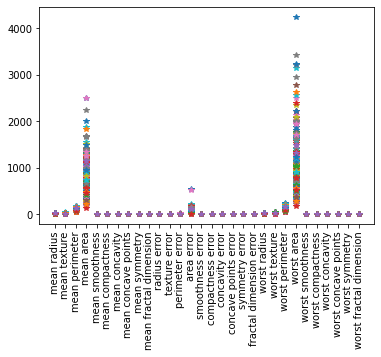

In [ ]:
plt.plot(X_train.T,'*')

plt.xticks(rotation='vertical')

In [ ]:

for i in len(X_train):
  if i < 1000:
    X_train['mean area']=0
  else:
    X_train['mean area']=1




TypeError: ignored

In [ ]:
new_binarised=X_train['mean area'].map(lambda x:0 if x < 1000 else 1)

In [ ]:
x={1:[1,2,3,4] ,2:[1,2,34,45]}
 
k=pd.DataFrame(data=x)
new_k=k[1].map(lambda x : 0  if x<2  else 1)
new_k

0    0
1    1
2    1
3    1
Name: 1, dtype: int64

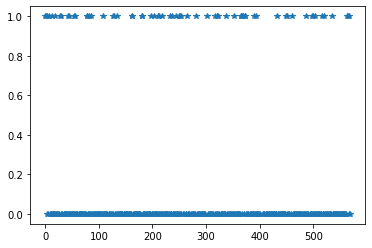

In [ ]:
plt.plot(new_binarised, '*')

In [ ]:
#binarizing the input 
#0 and 1 

new_binarised_train=X_train.apply(pd.cut,bins=2,labels=[1,0])
new_binarised_test=X_test.apply(pd.cut,bins=2,labels=[1,0])


In [ ]:
type(new_binarised_train)

pandas.core.frame.DataFrame

In [ ]:
new_binarised_train.head()

mean radius mean texture  ... worst symmetry worst fractal dimension
190           1            1  ...              0                       0
85            0            1  ...              1                       1
512           1            1  ...              1                       1
57            1            1  ...              1                       1
142           1            1  ...              1                       1

[5 rows x 30 columns]

In [ ]:
#converting into an array
new_binarised_train1=new_binarised_train.values
new_binarised_test1=new_binarised_test.values

In [ ]:
print(type(new_binarised_train1))

<class 'numpy.ndarray'>


In [ ]:
new_binarised_train1[100,:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=object)

In [ ]:
new_binarised_train.shape[0]

In [ ]:
for x,y in zip(range(4),range(10)):
  print(x,y)

0 0
1 1
2 2
3 3


In [ ]:
y_train_values=y_train.values

In [ ]:
y_train_values

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
x={1:np.arange(0,9),
   2:np.arange(10,19)}
   

In [ ]:
new_binarised_train.head()

mean radius mean texture  ... worst symmetry worst fractal dimension
190           1            1  ...              0                       0
85            0            1  ...              1                       1
512           1            1  ...              1                       1
57            1            1  ...              1                       1
142           1            1  ...              1                       1

[5 rows x 30 columns]

In [ ]:
#new_binarised_train
#new_binarised_test 

#actual data frames ;;;;;;;;;;;;;;;;;; //////

##new_binarised_train1
##new_binarised_test1



In [ ]:
b=3

i=100

if np.sum(new_binarised_train1[i , :]) >=b:
  print ( 'maligant')
else :
  print('benign')
if(y_train[i]==1 ):
  print('maligant infernce is correct')
else:
  print('benign infernce is correct')     

maligant
benign infernce is correct


In [ ]:
from random import randint

i=randint(0,new_binarised_train.shape[1])

if np.sum(new_binarised_train1[i , :]) >=b:
  print ( 'predicting:: maligant')
else :
  print('predicting:: benign')
if(y_train[i]==1 ):
  print('maligant infernce is correct')
else:
  print('benign infernce is correct')  

predicting:: maligant
benign infernce is correct


In [ ]:
#finding the best value of b

for x,y in zip(np.arange(0,6),np.arange(6,11)):
  print(x , y)

0 6
1 7
2 8
3 9
4 10


In [ ]:
b=3
y_pred_train=[]
accurate_rows=0
for x,y in zip (new_binarised_train1,y_train):
  y_pred=(np.sum(x)>=b)   ##returns 1
  y_pred_train.append(y_pred)
  accurate_rows+=(y==y_pred)   ##1==1
print(accurate_rows , accurate_rows/new_binarised_train.shape[0])


285 0.6263736263736264


In [ ]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [ ]:
for b in range (new_binarised_train.shape[1]+1):
  y_pred_train=[]
  accurate_rows=0

  for x,y in zip(new_binarised_train1,y_train):
    y_pred=(np.sum(x)>=b)
    y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)
  print(b , accurate_rows/new_binarised_train.shape[0]) 


0 0.6263736263736264
1 0.6263736263736264
2 0.6263736263736264
3 0.6263736263736264
4 0.6263736263736264
5 0.6263736263736264
6 0.6263736263736264
7 0.6263736263736264
8 0.6263736263736264
9 0.6263736263736264
10 0.6263736263736264
11 0.6263736263736264
12 0.6263736263736264
13 0.6285714285714286
14 0.6307692307692307
15 0.6329670329670329
16 0.643956043956044
17 0.6505494505494506
18 0.6593406593406593
19 0.6681318681318681
20 0.676923076923077
21 0.6923076923076923
22 0.7032967032967034
23 0.7252747252747253
24 0.7538461538461538
25 0.7868131868131868
26 0.8153846153846154
27 0.8373626373626374
28 0.8461538461538461
29 0.8197802197802198
30 0.756043956043956


In [ ]:
df.groupby('target').mean()

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
target                             ...                                         
0         17.462830     21.604906  ...        0.323468                 0.091530
1         12.146524     17.914762  ...        0.270246                 0.079442

[2 rows x 30 columns]

In [ ]:
#beningn is larger when u have more


#KYUKI we bnarized above as 1

In [ ]:
##predicting on the test set
b=28
from sklearn.metrics import accuracy_score

y_pred_test= []

for x in new_binarised_test1:
  y_pred=np.sum(x)>=b 
  y_pred_test.append(y_pred)

accuracy_score(y_pred_test,y_test)  



0.7807017543859649

In [ ]:
#mp neuron class


In [ ]:
class mpneuron :
  def__init__(self):
    self.b=None
  def model(self,x):
    return (sum(x) >=self.b)
  def predict(self,x):
    Y=[]
    x  

CLASS


In [ ]:
class mobile:
  pass

In [ ]:
mobile=mobile()

In [ ]:
print(type(mobile))

<class '__main__.mobile'>


In [ ]:
class mobile:
  def __init__(self,name):
    self.name=name

In [ ]:
mobile=mobile('oneplus7pro')

In [ ]:
class mobile:
  def __init__(self,name,is_android=False,screen_size=4.3):
    self.name=name
    self.is_android=is_android
    self.screen_size=screen_size

In [ ]:
mobile=mobile('iphone')

In [ ]:
mobile

In [ ]:
print(mobile.name,mobile.is_android,mobile.screen_size)

iphone False 4.3


In [ ]:
##tokeep function

In [ ]:
class cricket:
  def __init__(self,out=5):


    self.out=out  ##ya tu tum change karlo
    self.lbw=1
    def is_lbw(self):
      return self.lbw > 1

In [ ]:
c1=cricket(10)

In [ ]:
c1.out

10

In [ ]:
c1.lbw=13

**mp neuron class**

In [ ]:
nn